# Sentiment analysis on Sports Category

#### Data Loading and Preprocessing:
- The code starts by importing necessary libraries and loading the dataset.
- Two JSON files are loaded: one containing metadata about office products and the other containing reviews.
- The datasets are merged based on a common identifier 'asin'.
- Data cleaning steps involve handling null values and converting data types.

In [1]:
import numpy as np               # for numerical calculation
import seaborn as sb             # for visualization
import pandas as pd              # for data analysis
import matplotlib.pyplot as plt  # for visualization
import warnings
warnings.filterwarnings('ignore')# to ignore warning message
import re # regular expression

In [2]:
So_df=pd.read_json('meta_Sports_and_Outdoors.json.gz',lines=True,nrows=20000) # meta data


In [3]:
So_df.isnull().sum() # finding null value

category             0
tech1                0
description          0
fit                  0
title                0
also_buy             0
tech2                0
brand                0
feature              0
rank                 0
also_view            0
main_cat             0
similar_item         0
date                 0
price                0
asin                 0
imageURL             0
imageURLHighRes      0
details            138
dtype: int64

In [4]:
Sorev_df = pd.read_json('Sports_and_Outdoors.json.gz',lines=True,nrows=20000) # review data

# Data Structure

In [5]:
So_df.shape # meta

(20000, 19)

In [6]:
Sorev_df.shape # review

(20000, 12)

In [7]:
So_df.columns # meta data columns 

Index(['category', 'tech1', 'description', 'fit', 'title', 'also_buy', 'tech2',
       'brand', 'feature', 'rank', 'also_view', 'main_cat', 'similar_item',
       'date', 'price', 'asin', 'imageURL', 'imageURLHighRes', 'details'],
      dtype='object')

In [8]:
Sorev_df.columns # review data columns

Index(['overall', 'verified', 'reviewTime', 'reviewerID', 'asin',
       'reviewerName', 'reviewText', 'summary', 'unixReviewTime', 'vote',
       'style', 'image'],
      dtype='object')

In [9]:
df=pd.merge(So_df,Sorev_df,on='asin') # merging the dataset

In [10]:
df.to_csv('cap_Sports.csv') #converting it into csv file

In [11]:
df.shape # size of the dataset

(31642, 30)

In [12]:
df.columns #column names

Index(['category', 'tech1', 'description', 'fit', 'title', 'also_buy', 'tech2',
       'brand', 'feature', 'rank', 'also_view', 'main_cat', 'similar_item',
       'date', 'price', 'asin', 'imageURL', 'imageURLHighRes', 'details',
       'overall', 'verified', 'reviewTime', 'reviewerID', 'reviewerName',
       'reviewText', 'summary', 'unixReviewTime', 'vote', 'style', 'image'],
      dtype='object')

In [13]:
df.sample(3) # 3 sample dataset

,category,tech1,description,fit,title,also_buy,tech2,brand,feature,rank,...,verified,reviewTime,reviewerID,reviewerName,reviewText,summary,unixReviewTime,vote,style,image
1110,"[Sports & Outdoors, Sports & Fitness, Exercise...",,[Black Mountain Products (B.M.P.) resistance b...,,Black Mountain Products Resistance Band Set wi...,"[1612431712, B01AVDVHTI, B002YQUP7Q, B0136PR5T...",,Black Mountain,"[Bands included: Yellow (2-4 lbs.), blue (4-6 ...",303 in Sports & Outdoors (,...,True,"07 20, 2017",A2V9UG3M381S9W,amino head,perfect for a variety of exercises with a rang...,great for home workouts & therapy!,1500508800,NaN,NaN,NaN
10316,"[Sports & Outdoors, Sports & Fitness, Hunting ...","class=""a-keyvalue prodDetTable"" role=""present...",[The Black Ridgeback Hunter is a Blackie Colli...,,Case Black Ridgeback Hunter Knife,"[B06XG59V72, B00062B2J0, B06Y5CJS68, B000IXDRH...",,Case,[Tru-Sharp surgical stainless steel fixed blad...,"[>#100,375 in Tools & Home Improvement (See to...",...,False,"01 4, 2016",A2M4CX1ZRJTZYI,Travis Bickle,Positively love Case..found Ridgeback with box...,Positively love Case.,1451865600,NaN,"{'Size:': ' Skinner', 'Color:': ' Rosewood Ski...",NaN
17501,[],,[Bushnell is the leading brand in high-perform...,,Bushnell Falcon 133410 Binoculars with Case (B...,"[1426207204, B000051ZOA, B078HP5RWQ, B0756BXDT...",,Bushnell,[Fully coated optics for superior light transm...,"4,405 in Sports & Outdoors (",...,True,"01 31, 2017",A3PKXDBRYQRVN4,David Richard,Amazing value! Very good binoculars for the pr...,Amazing value! Very good binoculars for the price,1485820800,NaN,NaN,NaN


In [14]:
df.isnull().sum() # finding null values

category               0
tech1                  0
description            0
fit                    0
title                  0
also_buy               0
tech2                  0
brand                  0
feature                0
rank                   0
also_view              0
main_cat               0
similar_item           0
date                   0
price                  0
asin                   0
imageURL               0
imageURLHighRes        0
details              589
overall                0
verified               0
reviewTime             0
reviewerID             0
reviewerName           2
reviewText            11
summary                8
unixReviewTime         0
vote               27791
style              18724
image              31291
dtype: int64

In [15]:
df1=pd.read_csv('cap_Sports.csv')
df1.head()

,Unnamed: 0,category,tech1,description,fit,title,also_buy,tech2,brand,feature,...,verified,reviewTime,reviewerID,reviewerName,reviewText,summary,unixReviewTime,vote,style,image
0,0,"['Sports & Outdoors', 'Sports & Fitness', 'Oth...",NaN,['Dance tutu for girls ages 2-8 years. Perfect...,NaN,Girls Ballet Tutu Neon Blue,"['B009THXHPA', 'B00BEU1ZBI', 'B079PYLZTM', 'B0...",NaN,Bububibi,"['3 Layers - 100% Polyester Tulle, Hand Wash L...",...,False,"02 1, 2014",A23K73OVXJ04EG,Lamb612000,It was as described and fit my 6 year old gran...,Neon Blue Tutu,1391212800,NaN,NaN,NaN
1,1,"['Sports & Outdoors', 'Sports & Fitness', 'Oth...",NaN,['Dance tutu for girls ages 2-8 years. Perfect...,NaN,Girls Ballet Tutu Neon Blue,"['B009THXHPA', 'B00BEU1ZBI', 'B079PYLZTM', 'B0...",NaN,Bububibi,"['3 Layers - 100% Polyester Tulle, Hand Wash L...",...,True,"11 20, 2013",A2681T699HV6H1,Courtney R,very cute and went great with my Halloween cos...,loved it!,1384905600,NaN,NaN,NaN
2,2,"['Sports & Outdoors', 'Sports & Fitness', 'Oth...",NaN,['Dance tutu for girls ages 2-8 years. Perfect...,NaN,Girls Ballet Tutu Neon Blue,"['B009THXHPA', 'B00BEU1ZBI', 'B079PYLZTM', 'B0...",NaN,Bububibi,"['3 Layers - 100% Polyester Tulle, Hand Wash L...",...,True,"10 21, 2016",A374PA18DCGS5Y,Julie Ortiz,This item is very cheaply made and not full li...,One Star,1477008000,NaN,NaN,NaN
3,3,"['Sports & Outdoors', 'Sports & Fitness', 'Oth...",NaN,['Dance tutu for girls ages 2-8 years. Perfect...,NaN,Girls Ballet Tutu Neon Blue,"['B009THXHPA', 'B00BEU1ZBI', 'B079PYLZTM', 'B0...",NaN,Bububibi,"['3 Layers - 100% Polyester Tulle, Hand Wash L...",...,True,"10 18, 2016",A14PVW2N5YBWSA,Denise M.,cute,Five Stars,1476748800,NaN,NaN,NaN
4,4,"['Sports & Outdoors', 'Sports & Fitness', 'Oth...",NaN,['Dance tutu for girls ages 2-8 years. Perfect...,NaN,Girls Ballet Tutu Neon Blue,"['B009THXHPA', 'B00BEU1ZBI', 'B079PYLZTM', 'B0...",NaN,Bububibi,"['3 Layers - 100% Polyester Tulle, Hand Wash L...",...,True,"10 17, 2016",A2KWBC44QI2567,Danielle Zollar,Not as full as the picture suggests and it sme...,Smelly !,1476662400,NaN,NaN,NaN


In [16]:
df1.columns # coloumn names

Index(['Unnamed: 0', 'category', 'tech1', 'description', 'fit', 'title',
       'also_buy', 'tech2', 'brand', 'feature', 'rank', 'also_view',
       'main_cat', 'similar_item', 'date', 'price', 'asin', 'imageURL',
       'imageURLHighRes', 'details', 'overall', 'verified', 'reviewTime',
       'reviewerID', 'reviewerName', 'reviewText', 'summary', 'unixReviewTime',
       'vote', 'style', 'image'],
      dtype='object')

In [17]:
#df2=df1[['description','title','brand','feature','date','price','asin','overall','verified','reviewTime','reviewerID','reviewText','summary']]
df2=df1[['category','description','title','brand','date','price','asin','imageURL','overall','verified','reviewTime','reviewText','reviewerID']]
df2.head()

,category,description,title,brand,date,price,asin,imageURL,overall,verified,reviewTime,reviewText,reviewerID
0,"['Sports & Outdoors', 'Sports & Fitness', 'Oth...",['Dance tutu for girls ages 2-8 years. Perfect...,Girls Ballet Tutu Neon Blue,Bububibi,NaN,$6.54,0000031895,[],5,False,"02 1, 2014",It was as described and fit my 6 year old gran...,A23K73OVXJ04EG
1,"['Sports & Outdoors', 'Sports & Fitness', 'Oth...",['Dance tutu for girls ages 2-8 years. Perfect...,Girls Ballet Tutu Neon Blue,Bububibi,NaN,$6.54,0000031895,[],4,True,"11 20, 2013",very cute and went great with my Halloween cos...,A2681T699HV6H1
2,"['Sports & Outdoors', 'Sports & Fitness', 'Oth...",['Dance tutu for girls ages 2-8 years. Perfect...,Girls Ballet Tutu Neon Blue,Bububibi,NaN,$6.54,0000031895,[],1,True,"10 21, 2016",This item is very cheaply made and not full li...,A374PA18DCGS5Y
3,"['Sports & Outdoors', 'Sports & Fitness', 'Oth...",['Dance tutu for girls ages 2-8 years. Perfect...,Girls Ballet Tutu Neon Blue,Bububibi,NaN,$6.54,0000031895,[],5,True,"10 18, 2016",cute,A14PVW2N5YBWSA
4,"['Sports & Outdoors', 'Sports & Fitness', 'Oth...",['Dance tutu for girls ages 2-8 years. Perfect...,Girls Ballet Tutu Neon Blue,Bububibi,NaN,$6.54,0000031895,[],1,True,"10 17, 2016",Not as full as the picture suggests and it sme...,A2KWBC44QI2567


# Data Summary

In [18]:
df2.info() # dataset information

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31642 entries, 0 to 31641
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   category     31642 non-null  object
 1   description  31642 non-null  object
 2   title        31642 non-null  object
 3   brand        31605 non-null  object
 4   date         5703 non-null   object
 5   price        24393 non-null  object
 6   asin         31642 non-null  object
 7   imageURL     31642 non-null  object
 8   overall      31642 non-null  int64 
 9   verified     31642 non-null  bool  
 10  reviewTime   31642 non-null  object
 11  reviewText   31631 non-null  object
 12  reviewerID   31642 non-null  object
dtypes: bool(1), int64(1), object(11)
memory usage: 2.9+ MB


# Data Cleaning

In [19]:
df2.isnull().sum() # we have few null value have treat them

category           0
description        0
title              0
brand             37
date           25939
price           7249
asin               0
imageURL           0
overall            0
verified           0
reviewTime         0
reviewText        11
reviewerID         0
dtype: int64

In [20]:
df2.info() # data information

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31642 entries, 0 to 31641
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   category     31642 non-null  object
 1   description  31642 non-null  object
 2   title        31642 non-null  object
 3   brand        31605 non-null  object
 4   date         5703 non-null   object
 5   price        24393 non-null  object
 6   asin         31642 non-null  object
 7   imageURL     31642 non-null  object
 8   overall      31642 non-null  int64 
 9   verified     31642 non-null  bool  
 10  reviewTime   31642 non-null  object
 11  reviewText   31631 non-null  object
 12  reviewerID   31642 non-null  object
dtypes: bool(1), int64(1), object(11)
memory usage: 2.9+ MB


In [21]:
df2.dropna(inplace=True) # droping rows containg null value

In [22]:
df2.isnull().sum() # checking null values

category       0
description    0
title          0
brand          0
date           0
price          0
asin           0
imageURL       0
overall        0
verified       0
reviewTime     0
reviewText     0
reviewerID     0
dtype: int64

In [23]:
df2.shape # size of the dataset

(2701, 13)

**Feature Engineering**

In [24]:
df2['Sentimental']=df2['overall'].apply(lambda x: "Positive" if x>4 else ("Negative" if x<3 else "Neutral")) #creating new column depends upon review

In [25]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2701 entries, 22 to 26081
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   category     2701 non-null   object
 1   description  2701 non-null   object
 2   title        2701 non-null   object
 3   brand        2701 non-null   object
 4   date         2701 non-null   object
 5   price        2701 non-null   object
 6   asin         2701 non-null   object
 7   imageURL     2701 non-null   object
 8   overall      2701 non-null   int64 
 9   verified     2701 non-null   bool  
 10  reviewTime   2701 non-null   object
 11  reviewText   2701 non-null   object
 12  reviewerID   2701 non-null   object
 13  Sentimental  2701 non-null   object
dtypes: bool(1), int64(1), object(12)
memory usage: 298.1+ KB


In [26]:
df2['price']=df2['price'].replace(r'[^\d.]','',regex=True)#.astype('float')

In [ ]:
#num_count=df2['price'].str.count(r'\d') # filtering data has clear price value

In [27]:
df2['date'] = df2['date'].apply(lambda x: re.sub(r'<[^>]*>', '', x))

In [28]:
df2['date'] = df2['date'].apply(lambda x: re.sub('<[^<]+?>', '', x))

In [ ]:
#df4=df2[num_count<=4] # filtered dataset for further analysis

In [29]:
df3=df2[18:]

In [30]:
df3['date'].sample(19)

25805     April 7, 2006
24756     April 7, 2006
22094      July 8, 2006
25435     April 7, 2006
25709     April 7, 2006
10183       May 2, 2004
22025      July 8, 2006
24735     April 7, 2006
24933     April 7, 2006
220      August 4, 2003
22274      July 8, 2006
22015      July 8, 2006
24501     April 7, 2006
24581     April 7, 2006
22305      July 8, 2006
25048     April 7, 2006
21076     June 17, 2003
25607     April 7, 2006
25658     April 7, 2006
Name: date, dtype: object

In [31]:
# converting data types

df3['title']=df3.title.astype('str')
df3['brand']=df3.brand.astype('str')

df3['price']=df3.price.astype('float')
df3['date']=pd.to_datetime(df3['date'])


In [32]:
df3.isnull().sum() # checking null value

category       0
description    0
title          0
brand          0
date           0
price          0
asin           0
imageURL       0
overall        0
verified       0
reviewTime     0
reviewText     0
reviewerID     0
Sentimental    0
dtype: int64

In [33]:
df3.head()

,category,description,title,brand,date,price,asin,imageURL,overall,verified,reviewTime,reviewText,reviewerID,Sentimental
128,"['Sports & Outdoors', 'Outdoor Recreation', 'C...","[""Rely on delorme ATLAS & gazetteer paper maps...",Garmin DeLorme Atlas &amp; Gazetteer Paper Map...,Garmin,2003-08-04,21.96,0899333257,['https://images-na.ssl-images-amazon.com/imag...,5,False,"01 25, 2008",These Delorme Atlas & Gazetters are wondeful. ...,A2IUHI0QMEC9US,Positive
129,"['Sports & Outdoors', 'Outdoor Recreation', 'C...","[""Rely on delorme ATLAS & gazetteer paper maps...",Garmin DeLorme Atlas &amp; Gazetteer Paper Map...,Garmin,2003-08-04,21.96,0899333257,['https://images-na.ssl-images-amazon.com/imag...,3,False,"10 28, 2007",I purchased the maps so I could see the elevat...,APPM2Z3VPETEX,Neutral
130,"['Sports & Outdoors', 'Outdoor Recreation', 'C...","[""Rely on delorme ATLAS & gazetteer paper maps...",Garmin DeLorme Atlas &amp; Gazetteer Paper Map...,Garmin,2003-08-04,21.96,0899333257,['https://images-na.ssl-images-amazon.com/imag...,5,True,"05 7, 2007",Great Product! Nearly as good as having a sepe...,A210MD07WALT56,Positive
131,"['Sports & Outdoors', 'Outdoor Recreation', 'C...","[""Rely on delorme ATLAS & gazetteer paper maps...",Garmin DeLorme Atlas &amp; Gazetteer Paper Map...,Garmin,2003-08-04,21.96,0899333257,['https://images-na.ssl-images-amazon.com/imag...,5,True,"04 3, 2007",I have nothing but praise for DeLorme. We hav...,A2DTG02DSNOLQY,Positive
132,"['Sports & Outdoors', 'Outdoor Recreation', 'C...","[""Rely on delorme ATLAS & gazetteer paper maps...",Garmin DeLorme Atlas &amp; Gazetteer Paper Map...,Garmin,2003-08-04,21.96,0899333257,['https://images-na.ssl-images-amazon.com/imag...,5,True,"02 15, 2007",This is a must have for finding the tucked awa...,A1T4WK0L835QHQ,Positive


In [34]:
df3.info() # data info after convertion

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2683 entries, 128 to 26081
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   category     2683 non-null   object        
 1   description  2683 non-null   object        
 2   title        2683 non-null   object        
 3   brand        2683 non-null   object        
 4   date         2683 non-null   datetime64[ns]
 5   price        2683 non-null   float64       
 6   asin         2683 non-null   object        
 7   imageURL     2683 non-null   object        
 8   overall      2683 non-null   int64         
 9   verified     2683 non-null   bool          
 10  reviewTime   2683 non-null   object        
 11  reviewText   2683 non-null   object        
 12  reviewerID   2683 non-null   object        
 13  Sentimental  2683 non-null   object        
dtypes: bool(1), datetime64[ns](1), float64(1), int64(1), object(10)
memory usage: 296.1+ KB


In [35]:
df3.isnull().sum() # checking null value

category       0
description    0
title          0
brand          0
date           0
price          0
asin           0
imageURL       0
overall        0
verified       0
reviewTime     0
reviewText     0
reviewerID     0
Sentimental    0
dtype: int64

In [36]:
df3.to_csv('t2.csv') # saving clean data in csv file

# EDA

In [37]:
def seprate_data_type(df):
    cat = []
    con = []
    for column in df.columns:
        if df[column].nunique() <6:
            cat.append(column)
        else:
            con.append(column)
    return cat,con

In [38]:
cat,con=seprate_data_type(df3)

In [39]:
from tabulate import tabulate

In [40]:
print(tabulate({"categorical":cat,"continuous":con},headers = ['catergorical','continuous'])) # spliting data 

catergorical    continuous
--------------  ------------
overall         category
verified        description
Sentimental     title
                brand
                date
                price
                asin
                imageURL
                reviewTime
                reviewText
                reviewerID


# Univariant analysis

In [41]:
def cat_univariant(col): # user def function for univariant visual
    fig,ax = plt.subplots(1,2,figsize=(15,6))
    sb.countplot(x=col,ax=ax[0])
    plt.pie(col.value_counts(), labels=list(col.value_counts().index),autopct="%0.2f%%");

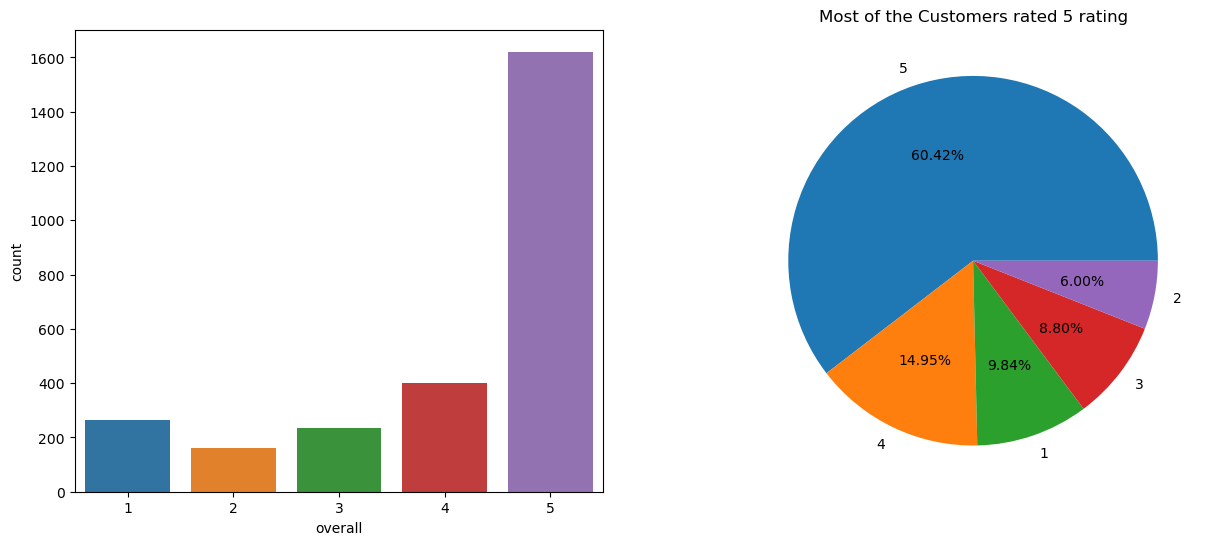

In [42]:
cat_univariant(df3['overall'])
plt.title("Most of the Customers rated 5 rating");

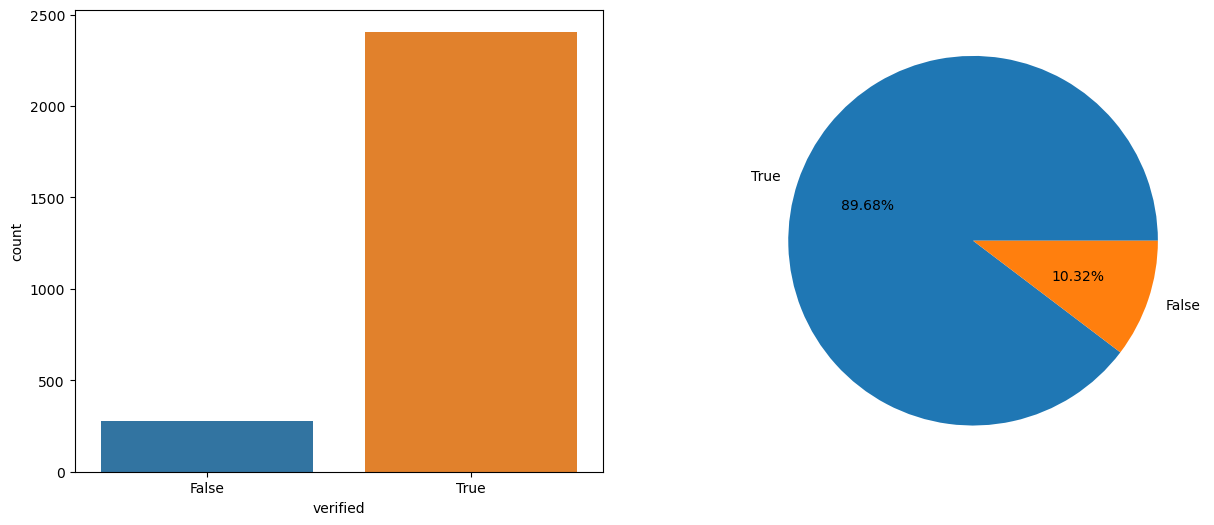

In [43]:
cat_univariant(df3['verified']) # for verified

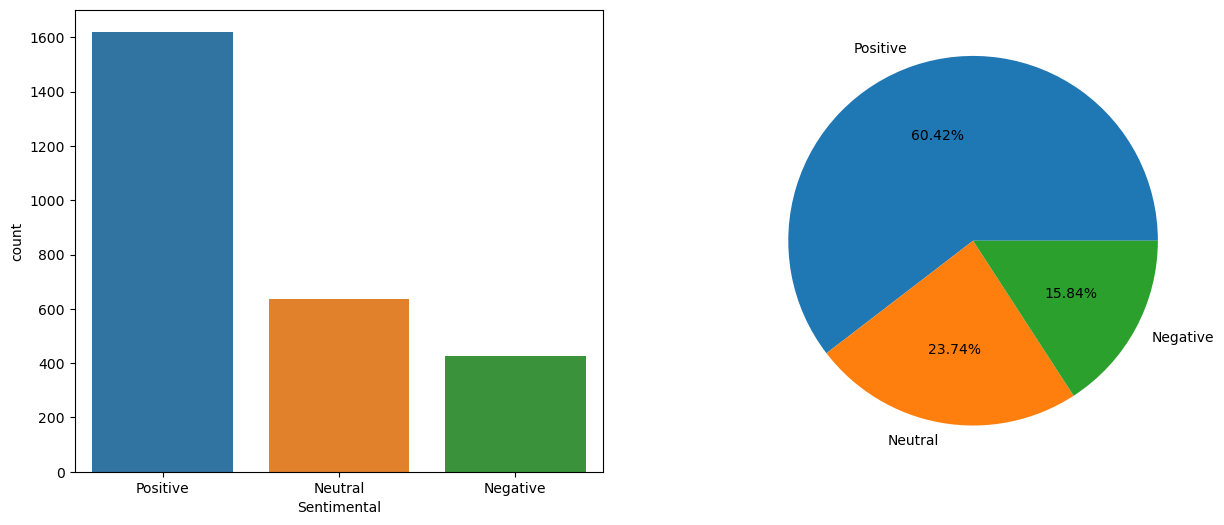

In [44]:
cat_univariant(df3['Sentimental']) # for sentimental

# Bi Variant Analysis

<AxesSubplot:xlabel='overall', ylabel='count'>

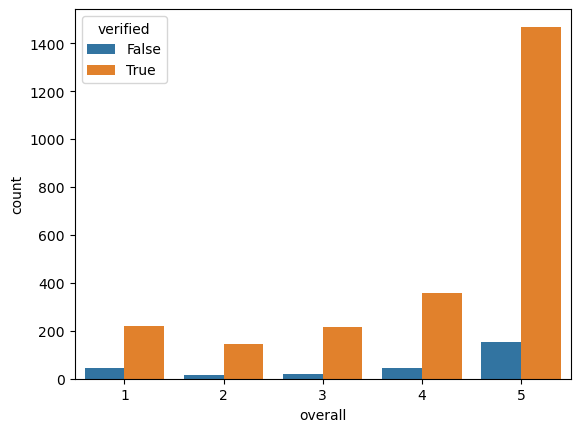

In [45]:
sb.countplot(df3['overall'],hue=df3['verified'])

In [46]:
df3.shape

(2683, 14)

# Handling imbalanced data

In [48]:
df3['Sentimental'].value_counts()

Positive    1621
Neutral      637
Negative     425
Name: Sentimental, dtype: int64

In [49]:
pos = df3[df3['Sentimental']=='Positive'].sample(700)
other = df3[df3['Sentimental']!='Positive']
df4= pd.concat([pos,other],axis=0)

In [50]:
df3.shape

(2683, 14)

In [51]:
df4.shape

(1762, 14)

In [52]:
df4['Sentimental'].value_counts()

Positive    700
Neutral     637
Negative    425
Name: Sentimental, dtype: int64

In [53]:
df4.sample(5)

,category,description,title,brand,date,price,asin,imageURL,overall,verified,reviewTime,reviewText,reviewerID,Sentimental
25383,"['Sports & Outdoors', 'Sports & Fitness', 'Boa...",['Explorer 200 Set Pool Boat Marketing Informa...,"Intex Explorer 200, 2-Person Inflatable Boat S...",Intex,2006-04-07,17.69,B000051ZHS,['https://images-na.ssl-images-amazon.com/imag...,1,True,"07 6, 2017",Absolutely awful. The raft came with more than...,A3EWU7E24L4LMV,Negative
25619,"['Sports & Outdoors', 'Sports & Fitness', 'Boa...",['Explorer 200 Set Pool Boat Marketing Informa...,"Intex Explorer 200, 2-Person Inflatable Boat S...",Intex,2006-04-07,17.69,B000051ZHS,['https://images-na.ssl-images-amazon.com/imag...,3,True,"05 13, 2016","It isn't a two person, it is max two light kid...",A2EIBLEW2L5RGU,Neutral
24962,"['Sports & Outdoors', 'Sports & Fitness', 'Boa...",['Explorer 200 Set Pool Boat Marketing Informa...,"Intex Explorer 200, 2-Person Inflatable Boat S...",Intex,2006-04-07,17.69,B000051ZHS,['https://images-na.ssl-images-amazon.com/imag...,3,True,"05 31, 2015","Quick summary : kid sized boat, no leaks, susc...",A2L02NKQRBRYJC,Neutral
22407,"['Sports & Outdoors', 'Sports & Fitness', 'Boa...",['Compact size boat with lots of features. U.S...,"Intex Explorer 100, 1-Person Inflatable Boat",Intex,2006-07-08,12.34,B00004YTPE,['https://images-na.ssl-images-amazon.com/imag...,5,False,"12 20, 2014",Excellent raft. I've even had it sitting in th...,AXSKRZIIA8KJI,Positive
21147,"['Sports & Outdoors', 'Sports & Fitness', 'Hun...",['The PowerLock is a Government Services Admin...,SOG Multitool Pliers Pocket Tool &ndash; &ldqu...,SOG,2003-06-17,64.99,B00004U9IW,['https://images-na.ssl-images-amazon.com/imag...,5,True,"09 26, 2015",Grate replace ment for the one I destroyed by ...,A1VXV83USMWALM,Positive


# Sentiment Analysis

**Word Tokenization**

In [54]:
import spacy  # spacy library
nlp = spacy.load('en_core_web_sm') # english pipline
import string 
from nltk.corpus import stopwords # to remove stopwords usig nltk
import regex # regular expression

from sklearn.model_selection import train_test_split # for spliting
from sklearn.model_selection import KFold,StratifiedKFold,RepeatedStratifiedKFold,cross_val_score # for accuracy 

from sklearn.feature_extraction.text import TfidfVectorizer # for vectorization
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score # accuracy
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import StackingClassifier

from sklearn.multiclass import OneVsRestClassifier # vectorization
from sklearn.preprocessing import MultiLabelBinarizer


In [55]:
def text_process(text): # cleaning the data
    nopunc = [char for char in  text if char not in string.punctuation]
    nopunc = ''.join(nopunc)
    return [word for word in nopunc.split() if word.lower() not in stopwords.words('english')]

In [56]:
def list_to_string(s): # converting list to string
    str1 = " "
    return (str1.join(s))

In [57]:
df4['clean_review']=df4['reviewText'].apply(text_process) # cleaning data

In [58]:
df4['clean_review']=df4['clean_review'].apply(list_to_string) # converting data from list to string

**Lemmatization**

In [59]:
def lemmatize_text(text): # converting words to base words
    doc = nlp(text)
    lemmatize_words = [token.lemma_ for token in doc]
    return ' '.join(lemmatize_words)

In [60]:
df4['Lemmatizedtext']= df4['clean_review'].apply(lemmatize_text)

In [61]:
a=" ".join(df4['Lemmatizedtext'])
a[0:10000]

'please bare mind review nothing boat do not think adult ever try use boat would not let child outside pool either use strictly gear holder tie large inflatable boat put tackle box cooler beer etc tie rope actual boat fantastic job hold gear awesome product great price hold recommend 2 adult 1 kid numerous time hold Super fun everyone ok kid love love everything great size recieve Ridgeback WOW quality knife great price normally stay away 100 price tag see make America lifetime warrenty order one knife solid razor sharp Fits hand perfectly would buy knife heartbeat wonderful quality use beach awesome do not waste money buying beach buy Amazon seriously 11 do not expect last 48 hour make 3 camping trip 8 year old boy still one piece around pretty cheap pretty thin plastic careful Ill darn stood jump cringe every time make really could use well rope around grip maybe provide paracord since camping replace honestly great little boat long do not plan keep year carry maybe 60 pound wear lif

**Word Frequency**

In [62]:
words = str(a[0:100000])
doc = nlp(words)
from collections import Counter
count = Counter()
for token in doc:
    count[token.orth_]+=1
n= count.most_common(10)
n

[('boat', 300),
 ('use', 249),
 ('great', 243),
 ('knife', 221),
 ('one', 192),
 ('kid', 188),
 ('well', 188),
 ('not', 177),
 ('love', 167),
 ('get', 161)]

In [63]:
frequency = pd.DataFrame(n,columns=['letter','Frequency count'])
frequency

,letter,Frequency count
0,boat,300
1,use,249
2,great,243
3,knife,221
4,one,192
5,kid,188
6,well,188
7,not,177
8,love,167
9,get,161


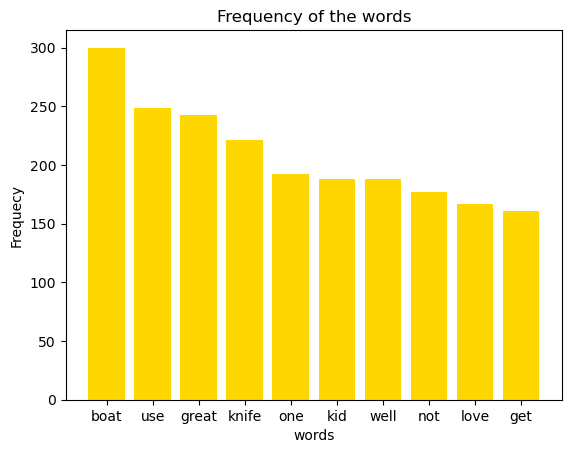

In [64]:
plt.bar(x=frequency['letter'],height=frequency['Frequency count'],color='Gold')
plt.title("Frequency of the words")
plt.xlabel('words')
plt.ylabel('Frequecy');

**Part of Speech and Tagging**

In [65]:
for token in doc:
    print(token.text," | ",token.pos_," | ",token.tag_)

please  |  INTJ  |  UH
bare  |  ADJ  |  JJ
mind  |  NOUN  |  NN
review  |  NOUN  |  NN
nothing  |  PRON  |  NN
boat  |  NOUN  |  NN
do  |  AUX  |  VBP
not  |  PART  |  RB
think  |  VERB  |  VB
adult  |  NOUN  |  NN
ever  |  ADV  |  RB
try  |  VERB  |  VB
use  |  NOUN  |  NN
boat  |  NOUN  |  NN
would  |  AUX  |  MD
not  |  PART  |  RB
let  |  VERB  |  VB
child  |  NOUN  |  NN
outside  |  ADJ  |  JJ
pool  |  NOUN  |  NN
either  |  CCONJ  |  CC
use  |  VERB  |  VBP
strictly  |  ADV  |  RB
gear  |  NOUN  |  NN
holder  |  NOUN  |  NN
tie  |  VERB  |  VB
large  |  ADJ  |  JJ
inflatable  |  ADJ  |  JJ
boat  |  NOUN  |  NN
put  |  VERB  |  VBD
tackle  |  PROPN  |  NNP
box  |  PROPN  |  NNP
cooler  |  PROPN  |  NNP
beer  |  NOUN  |  NN
etc  |  X  |  FW
tie  |  VERB  |  VB
rope  |  NOUN  |  NN
actual  |  ADJ  |  JJ
boat  |  NOUN  |  NN
fantastic  |  ADJ  |  JJ
job  |  NOUN  |  NN
hold  |  NOUN  |  NN
gear  |  VERB  |  VB
awesome  |  ADJ  |  JJ
product  |  NOUN  |  NN
great  |  ADJ  |  JJ
price 

In [66]:
noun = []
adv  = []
verb = []
adp  = []
adj  = []

for word in doc:
    if word.pos_== 'NOUN':
        noun.append(word)
    if word.pos_== 'ADV':
        adv.append(word)
    if word.pos_== 'VERB':
        verb.append(word)
    if word.pos_== 'ADP':
        adp.append(word)
    if word.pos_== 'ADJ':
        adj.append(word)
        
print("count of noun words = {}".format(len(noun)))
print("count of adv words = {}".format(len(adv)))
print("count of verb words = {}".format(len(verb)))
print("count of adp words = {}".format(len(adp)))
print("count of adj words = {}".format(len(adj)))

count of noun words = 7015
count of adv words = 1231
count of verb words = 2527
count of adp words = 226
count of adj words = 2784


In [67]:
n=len(noun)
n_adv=len(adv)
n_verb=len(verb)
n_adp=len(adp)
n_adj=len(adj)
grammer=pd.DataFrame(["noun","adverb","verb","adp","adj"],columns=['Grammer'])
grammer['count']=[n,n_adv,n_verb,n_adp,n_adj]

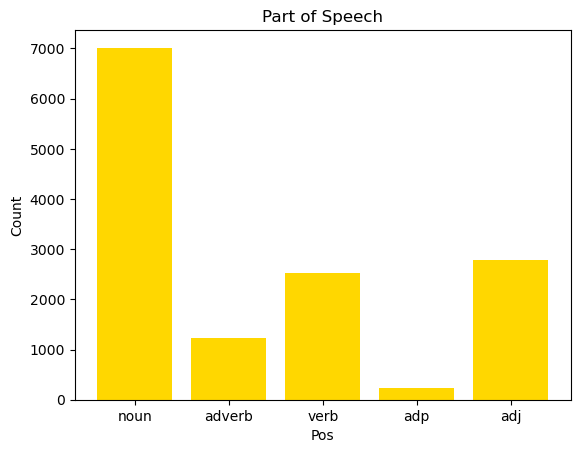

In [68]:
plt.bar(x=grammer['Grammer'],height=grammer['count'],color='Gold')
plt.title("Part of Speech")
plt.xlabel("Pos")
plt.ylabel('Count');

**NER**

In [69]:
for ent in doc.ents:
    print(ent.text," | ",ent.label_," | ",spacy.explain(ent.label_))

2  |  CARDINAL  |  Numerals that do not fall under another type
1  |  CARDINAL  |  Numerals that do not fall under another type
Super  |  ORG  |  Companies, agencies, institutions, etc.
Ridgeback  |  PERSON  |  People, including fictional
100  |  CARDINAL  |  Numerals that do not fall under another type
America  |  GPE  |  Countries, cities, states
one  |  CARDINAL  |  Numerals that do not fall under another type
Fits  |  ORG  |  Companies, agencies, institutions, etc.
Amazon  |  ORG  |  Companies, agencies, institutions, etc.
11  |  CARDINAL  |  Numerals that do not fall under another type
48 hour  |  TIME  |  Times smaller than a day
3  |  CARDINAL  |  Numerals that do not fall under another type
8 year old  |  DATE  |  Absolute or relative dates or periods
one  |  CARDINAL  |  Numerals that do not fall under another type
Ill  |  GPE  |  Countries, cities, states
60 pound  |  QUANTITY  |  Measurements, as of weight or distance
1  |  CARDINAL  |  Numerals that do not fall under anothe

In [70]:
df4.shape

(1762, 16)

In [71]:
df4['Sentimental'].value_counts()

Positive    700
Neutral     637
Negative    425
Name: Sentimental, dtype: int64

In [72]:
x=df4.Lemmatizedtext[:10000] # independent variable
y=df4.Sentimental[:10000] # target variable

In [73]:
x.shape

(1762,)

In [74]:
multilaberl_binarizer = MultiLabelBinarizer()
multilaberl_binarizer.fit(y)
Y=multilaberl_binarizer.transform(y)

In [75]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.3,random_state=47) # splitting dataset into train and test

In [76]:
print("independent variable train : ",len(x_train))
print("independent variable test  : ",len(x_test))
print("dependent variable train : ", len(y_train))
print("dependent variable test  : ", len(y_test))

independent variable train :  1233
independent variable test  :  529
dependent variable train :  1233
dependent variable test  :  529


In [77]:
def vectorization(xtrain,xtest,ytrain,ytest):  # vectorizaiton
    global myvector
    myvector = TfidfVectorizer()
    global myobject
    myobject = myvector.fit_transform(xtrain)
    global myobject1
    myobject1= myvector.transform(xtest)
    print(myobject.toarray())
    
    

In [78]:
vectorization(x_train,x_test,y_train,y_test)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [79]:
def selecting_model(model):
    clf= model()
    clf=clf.fit(myobject,y_train)
    y_pred=clf.predict(myobject1)
    print(classification_report(y_test,y_pred))

In [80]:
model_log = LogisticRegression()
model_dt  = DecisionTreeClassifier()
model_rf  = RandomForestClassifier()
model_svc = SVC()
model_knn = KNeighborsClassifier()
model_ada = AdaBoostClassifier()
model_nb  = MultinomialNB()

In [81]:
ovr = OneVsRestClassifier(model_log) # it has 3 target variable

In [82]:
y_test

22389    Positive
24593    Positive
26071    Positive
21094    Negative
10361    Positive
           ...   
10385     Neutral
25939     Neutral
21121    Positive
24660    Positive
24869    Positive
Name: Sentimental, Length: 529, dtype: object

In [83]:
mod=ovr.fit(myobject,y_train)
y_pred = ovr.predict(myobject1)
print(classification_report(y_test,y_pred))
print("Actual :",y_test,"\nPredicted :",y_pred)

              precision    recall  f1-score   support

    Negative       0.80      0.74      0.77       105
     Neutral       0.74      0.66      0.69       206
    Positive       0.72      0.83      0.77       218

    accuracy                           0.74       529
   macro avg       0.75      0.74      0.75       529
weighted avg       0.74      0.74      0.74       529

Actual : 22389    Positive
24593    Positive
26071    Positive
21094    Negative
10361    Positive
           ...   
10385     Neutral
25939     Neutral
21121    Positive
24660    Positive
24869    Positive
Name: Sentimental, Length: 529, dtype: object 
Predicted : ['Positive' 'Positive' 'Positive' 'Neutral' 'Positive' 'Positive'
 'Neutral' 'Positive' 'Positive' 'Neutral' 'Neutral' 'Positive' 'Negative'
 'Positive' 'Positive' 'Positive' 'Positive' 'Neutral' 'Positive'
 'Positive' 'Positive' 'Positive' 'Positive' 'Positive' 'Positive'
 'Neutral' 'Positive' 'Neutral' 'Negative' 'Neutral' 'Neutral' 'Positive'
 'Pos

In [84]:
comp=pd.DataFrame({"Actual :":y_test,"Predicted":y_pred}) # for comparition
comp


,Actual :,Predicted
22389,Positive,Positive
24593,Positive,Positive
26071,Positive,Positive
21094,Negative,Neutral
10361,Positive,Positive
...,...,...
10385,Neutral,Positive
25939,Neutral,Neutral
21121,Positive,Neutral
24660,Positive,Positive


**Accuracy**

In [85]:
print("Accuracy of train data :",ovr.score(myobject,y_train))
print("Accuracy of test data  :",ovr.score(myobject1,y_test))

Accuracy of train data : 0.8856447688564477
Accuracy of test data  : 0.7429111531190926


 **Model Evaluation**

In [86]:
confusion_matrix(y_test,y_pred)

array([[ 78,  17,  10],
       [ 12, 135,  59],
       [  7,  31, 180]], dtype=int64)

In [87]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

    Negative       0.80      0.74      0.77       105
     Neutral       0.74      0.66      0.69       206
    Positive       0.72      0.83      0.77       218

    accuracy                           0.74       529
   macro avg       0.75      0.74      0.75       529
weighted avg       0.74      0.74      0.74       529



# Prediction on new unseen review text

In [88]:
def new_data(txt):
    text = myvector.transform([txt])
    return mod.predict(text)

In [89]:
new_data("Playing baseball is good for one's health")

array(['Neutral'], dtype='<U8')

In [126]:
new_data('bad')

array(['Negative'], dtype='<U8')

In [91]:
new_data("I thought the book was entertaining and cute, and an introduction to what goes on at a laundromat. However, I don't think I would get this book for a young todder (under 4) due to the fact that there was one scene where Corduroy is alone in the dark of laudromat, inside a wired laundry cart, and he looks terrified. The picture is very scary and sad. I think it's too much for a little kid. But overall, it's cute, and the ending is good.")

array(['Neutral'], dtype='<U8')

In [92]:
new_data("The map looks just fine, but Amazon shipped it in a plastic bag. With no protection, it arrived badly crushed and bent, completely unusable. Amazon did replace it promptly, but this time used a flimsy cardboard box that still didn't protect it from damage. On a third attempt, also very prompt, they didn't even use the plastic bag, and it was badly damaged again. I appreciate the quick turnaround on the original order and the replacements, but it is absolutely ridiculous that a rolled-up laminated map would be packed for shipping without a protective tube (or without even a box, in two cases). I gave up on Amazon and will purchase it somewhere else. It looks like a nice map.")

array(['Positive'], dtype='<U8')

In [93]:
import pickle
with open("sentiment_analysis_model.pickle","wb")as f:
    pickle.dump(ovr,f)

In [ ]:
import joblib
model = joblib.load("sentiment_analysis_model.pickle")

In [ ]:
#!pip install textblob

from tkinter import *
import tkinter as tk

from textblob import TextBlob
 
def analyze_sentiment():

    sentence = entry_field.get()

    analysis = TextBlob(sentence)

    polarity = analysis.sentiment.polarity

    subjectivity = analysis.sentiment.subjectivity
 
    if polarity > 0:

        sentiment_label.config(text="Positive")

    elif polarity == 0:

        sentiment_label.config(text="Neutral")

    else:

        sentiment_label.config(text="Negative")
 
    subjectivity_label.config(text=f"Subjectivity: {subjectivity:.2f}")
 
root= tk.Tk()

root.title("Sentiment Analysis")

root.geometry("1080x400")
root.config(bg='lightgreen')


header = Label(root,text='Sentimental analysis',bg='yellow',foreground='black',font=('Arial',25,'bold'))
header.pack()
 
label = tk.Label(root, text="Enter a sentence:",font=('Arial',20,'bold'),bg='yellow')
label.pack(pady=12)
 
entry_field = tk.Entry(root,width=40,font=("Arial",18),bg='White',fg='black')

entry_field.pack()
 
analyze_button = tk.Button(root, text="Analyze review", command=analyze_sentiment,font=("Arial",15,"bold"))

analyze_button.pack(pady=20)
 
sentiment_label = tk.Label(root, text="",font=("Arial",18,'bold'))

sentiment_label.pack(pady=10)
 
subjectivity_label = tk.Label(root, text="")

subjectivity_label.pack()
 
root.mainloop()


# Clustering

In [94]:
from sklearn.preprocessing import LabelEncoder # encoding
from sklearn.preprocessing import MinMaxScaler,StandardScaler # scaling

from sklearn.cluster import k_means
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans

In [95]:
df4= df4[['price','overall']]
df4.head()

,price,overall
22277,12.34,5
24698,17.69,5
25529,17.69,5
25596,17.69,5
24831,17.69,5


In [96]:
df4.tail()

,price,overall
26062,17.69,3
26065,17.69,4
26074,17.69,4
26078,17.69,3
26079,17.69,4


In [97]:
df4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1762 entries, 22277 to 26079
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   price    1762 non-null   float64
 1   overall  1762 non-null   int64  
dtypes: float64(1), int64(1)
memory usage: 41.3 KB


In [98]:
mn=MinMaxScaler()
sc=StandardScaler()

In [99]:
df4.isnull().sum()

price      0
overall    0
dtype: int64

In [100]:
df4.shape

(1762, 2)

In [101]:
df4.sample(50)

,price,overall
22196,12.34,5
25467,17.69,3
22103,12.34,5
24892,17.69,2
22022,12.34,5
25384,17.69,2
25327,17.69,4
25805,17.69,5
24982,17.69,5
25527,17.69,3


In [102]:
df4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1762 entries, 22277 to 26079
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   price    1762 non-null   float64
 1   overall  1762 non-null   int64  
dtypes: float64(1), int64(1)
memory usage: 41.3 KB


In [103]:
df5 = mn.fit_transform(df4[['price','overall']])

In [104]:
df6=pd.DataFrame(df5,columns=df4.columns)[:10000]
df6.head()

,price,overall
0,0.149160,1.0
1,0.235617,1.0
2,0.235617,1.0
3,0.235617,1.0
4,0.235617,1.0


In [105]:
df6.shape

(1762, 2)

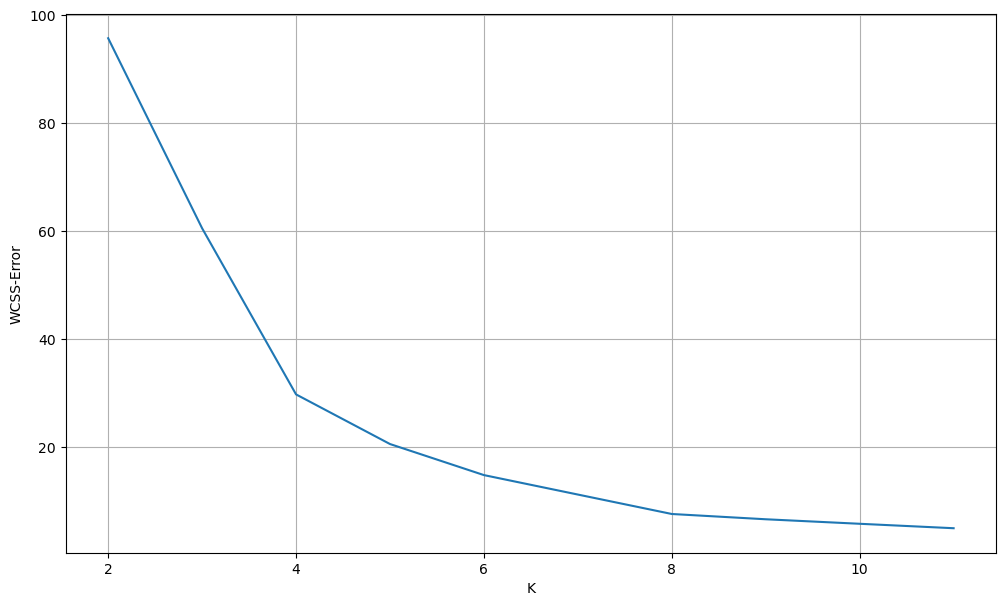

In [106]:
err= []
for k in range(2,12):
    km= KMeans(k)
    km.fit(df6)
    err.append(km.inertia_)
    
plt.figure(figsize=(12,7))
plt.plot(range(2,12),err)
plt.xlabel("K")
plt.ylabel("WCSS-Error")
plt.grid(True)

In [107]:
for k in range(2,12):
    km =KMeans(k)
    hc =km.fit_predict(df6)
    print(k,"=",silhouette_score(df6,hc))

2 = 0.6293540589473811
3 = 0.6699513404847898
4 = 0.664145353343477
5 = 0.6765141786876685
6 = 0.7468516578946642
7 = 0.7680397124874635
8 = 0.7712755744963415
9 = 0.7861841216843312
10 = 0.7891541852316838
11 = 0.8382806940176657


In [108]:
kmeans_model = KMeans(4)
kmeans_model.fit(df6)

KMeans(n_clusters=4)

In [109]:
kmeans_model.labels_

array([3, 3, 3, ..., 0, 0, 0])

In [110]:
pred= kmeans_model.fit_predict(df6)
pred

array([0, 0, 0, ..., 2, 2, 2])

In [111]:
df6['kmean']=pred

In [112]:
df6.sample(5)

,price,overall,kmean
712,0.304622,0.5,2
1615,0.235617,0.5,2
1717,0.235617,0.0,1
1060,0.235617,0.0,1
74,0.235617,1.0,0


# Visualizing all the clustering

# Kmeans model

In [113]:
kmeans_model.cluster_centers_ # centroid center

array([[0.19980407, 1.        ],
       [0.21564481, 0.09292566],
       [0.22217836, 0.65661157],
       [1.        , 0.734375  ]])

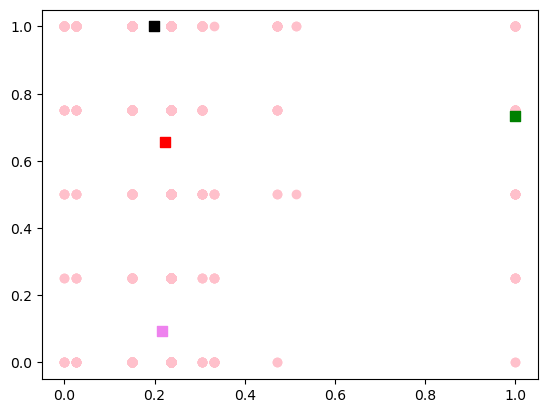

In [114]:

clus_no = ['black', 'violet', 'red', 'green']#, 'yellow', 'blue', 'brown', 'orange', 'pink', 'purple','grey']
n=0
plt.scatter(df6['price'],df6['overall'],c='pink')
for i,j in kmeans_model.cluster_centers_:
    plt.scatter(i,j,s=60,marker='s',c=clus_no[n])
    n+=1

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


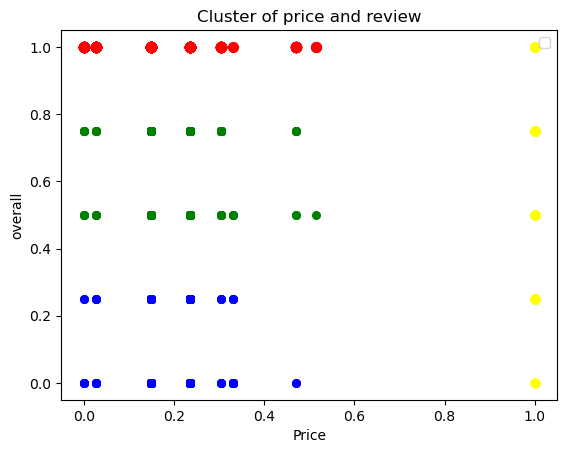

In [115]:
plt.scatter(df6.values[pred==0,0],df6.values[pred==0,1],s=50,c='red')
plt.scatter(df6.values[pred==1,0],df6.values[pred==1,1],s=30,c='blue')
plt.scatter(df6.values[pred==2,0],df6.values[pred==2,1],s=30,color='green')#,label='Low price and high review')
plt.scatter(df6.values[pred==3,0],df6.values[pred==3,1],s=40,color='yellow')#,label='High price and high review')
plt.title("Cluster of price and review")
plt.xlabel("Price")
plt.ylabel("overall")
plt.legend()
plt.show()

# Hierarchical clustering

In [116]:
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as sch

In [117]:
for i in range(2,10):
    for j in ['ward','single','complete','average']:
        hc = AgglomerativeClustering(n_clusters=i,affinity='euclidean',linkage=j)
        y_ch = hc.fit_predict(df6)
        print(i,"=",silhouette_score(df6,y_ch),j)

2 = 0.7130870462290672 ward
2 = 0.7130870462290672 single
2 = 0.4539332291756538 complete
2 = 0.7130870462290672 average
3 = 0.8475750344350643 ward
3 = 0.6941261993336195 single
3 = 0.6941261993336195 complete
3 = 0.6941261993336195 average
4 = 0.8888457398178768 ward
4 = 0.8888457398178768 single
4 = 0.8888457398178768 complete
4 = 0.8888457398178768 average
5 = 0.8667638976560673 ward
5 = 0.8817502050398052 single
5 = 0.8864007871881051 complete
5 = 0.8864007871881051 average
6 = 0.8469544441847513 ward
6 = 0.8827111758497461 single
6 = 0.694631000068959 complete
6 = 0.8855177479118871 average
7 = 0.7812055381927778 ward
7 = 0.888867662963425 single
7 = 0.5275018772635591 complete
7 = 0.7658342717168971 average
8 = 0.7763227770749931 ward
8 = 0.8969140305431715 single
8 = 0.4489340988114676 complete
8 = 0.6871753160624025 average
9 = 0.7812737496533932 ward
9 = 0.8750204974926267 single
9 = 0.44801261592365 complete
9 = 0.6674124589536631 average


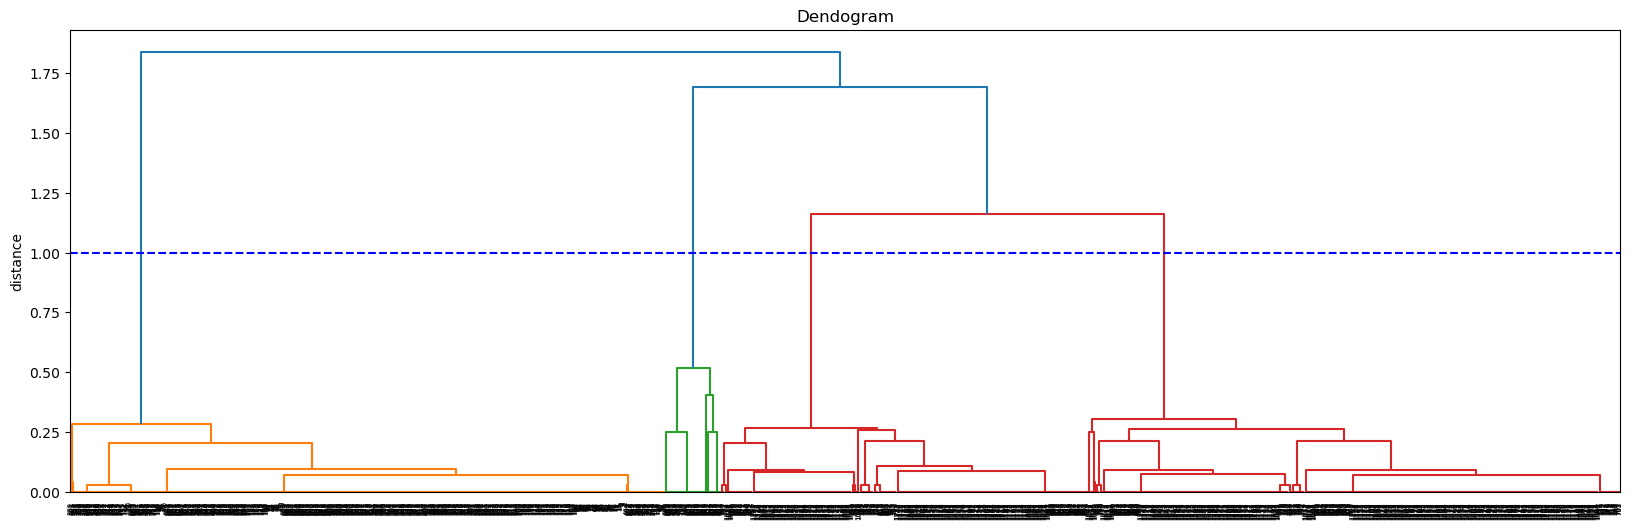

In [118]:
plt.figure(figsize=(20,6))
sch.dendrogram(sch.linkage(df6,method='average'),labels=df6.index)
plt.axhline(y=1,color='blue',linestyle='--')
plt.title("Dendogram")
plt.xlabel("")
plt.ylabel("distance")
plt.show()

4 = 0.9164407875107319 ward has best

In [119]:
hc = AgglomerativeClustering(n_clusters=4,affinity='euclidean',linkage='ward')
y_hc = hc.fit_predict(df6)
silhouette_score(df6,y_hc)

0.8888457398178768

Text(0.5, 1.0, 'Hierarchical clustering')

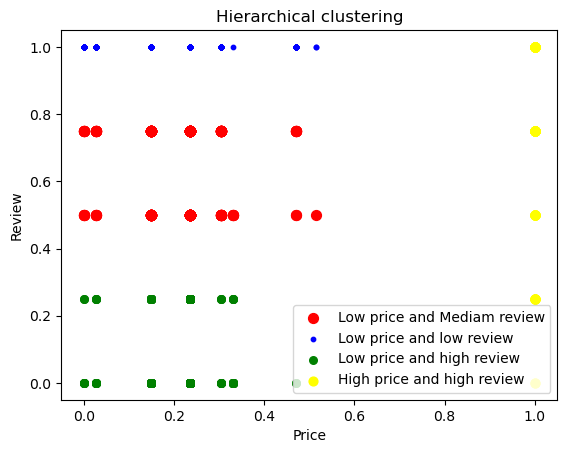

In [120]:
plt.scatter(df6.values[y_hc==0,0],df6.values[y_hc==0,1],s=50,color='red',label='Low price and Mediam review')
plt.scatter(df6.values[y_hc==1,0],df6.values[y_hc==1,1],s=10,color='blue',label='Low price and low review')
plt.scatter(df6.values[y_hc==2,0],df6.values[y_hc==2,1],s=30,color='green',label='Low price and high review')
plt.scatter(df6.values[y_hc==3,0],df6.values[y_hc==3,1],s=40,color='yellow',label='High price and high review')
plt.xlabel("Price")
plt.ylabel("Review")
plt.legend()
plt.title("Hierarchical clustering")

# DBSCAN Algorithm

In [121]:
from sklearn.cluster import DBSCAN

In [122]:
dbscan = DBSCAN()
dbscan.fit(df6)
df6['dbscan_label']=dbscan.labels_
silhouette_score(df6,df6['dbscan_label'])

0.9229474671550183

In [123]:
df5

array([[0.14915966, 1.        ],
       [0.23561732, 1.        ],
       [0.23561732, 1.        ],
       ...,
       [0.23561732, 0.75      ],
       [0.23561732, 0.5       ],
       [0.23561732, 0.75      ]])

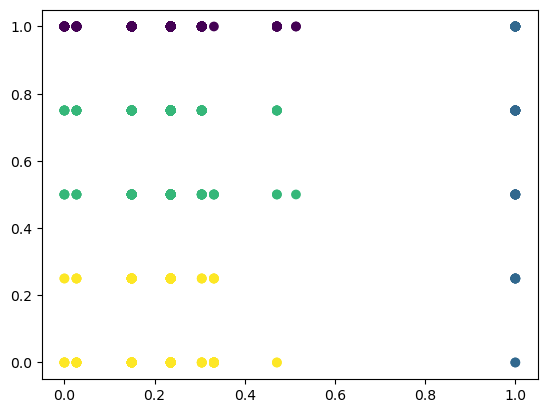

In [124]:
plt.scatter(df6['price'],df6['overall'],c=df6['dbscan_label'])


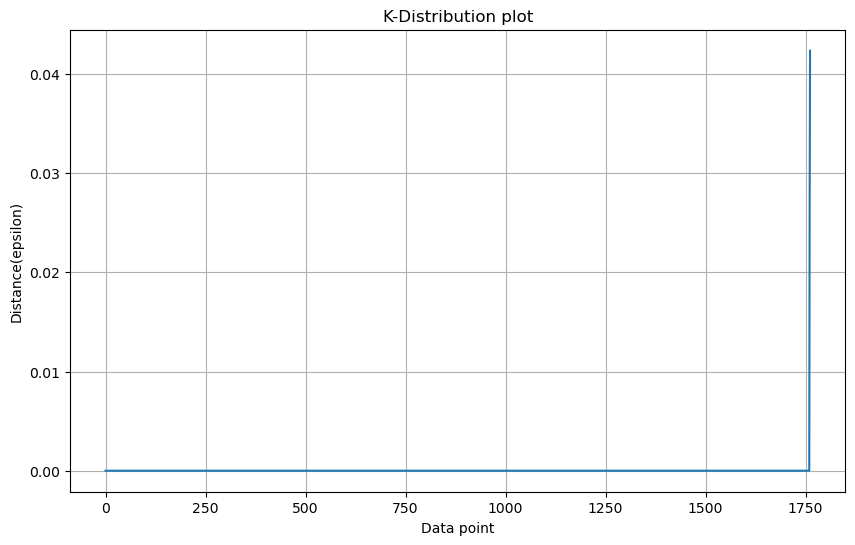

In [125]:
#evaluate the dbscan
from sklearn.neighbors import NearestNeighbors
neigh = NearestNeighbors(n_neighbors=2)
nrbr = neigh.fit(df6)
distance,indices = nrbr.kneighbors(df6)

distances = np.sort(distance,axis=0)
distances = distances[:,1]
plt.figure(figsize=(10,6))
plt.plot(distances)
plt.title("K-Distribution plot")
plt.xlabel("Data point")
plt.ylabel("Distance(epsilon)")
plt.grid(True);